# Ejercicio 2.
Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$ respecto a $h$.

In [12]:
function derivada(f,x,h) #Nombramos nuestra función "derivada" con sus respectivas variables.
       df=(f(x+h)-f(x))/h #Introducimos la derivada (la fórmula anteriormente vista).
    end

derivada (generic function with 1 method)

In [13]:
f(x)=cos(x) #Definimos la función coseno.


f (generic function with 1 method)

In [14]:
derivada(f,0,0.0005) #Calculamos la derivada de coseno en el punto 0.


-0.000249999994705874

In [15]:
-1*sin(0) # respuesta exacta, a la que debe converger la solución.


-0.0

In [21]:
using PyPlot


In [17]:
function derivada2(f,x)
list=zeros(100) #Se crea una lista de ceros donde se guardará el valor de la derivada
n=1
           for i in 1:100 
              df=(f(x+(1/n))-f(x))*n #Aplicamos la derivada
              list[i]=df; #guardamos el valor de la derivada en list
              n+=1 # se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list 
end

derivada2 (generic function with 1 method)

In [18]:
a=derivada2(f,0) #lista de valores para graficar


100-element Array{Float64,1}:
 -0.459698  
 -0.244835  
 -0.165129  
 -0.12435   
 -0.0996671 
 -0.0831406 
 -0.0713072 
 -0.0624187 
 -0.0554984 
 -0.0499583 
 -0.0454232 
 -0.0416426 
 -0.0384426 
  ⋮         
 -0.00561792
 -0.0055555 
 -0.00549445
 -0.00543473
 -0.00537629
 -0.0053191 
 -0.00526311
 -0.00520829
 -0.00515459
 -0.005102  
 -0.00505046
 -0.00499996

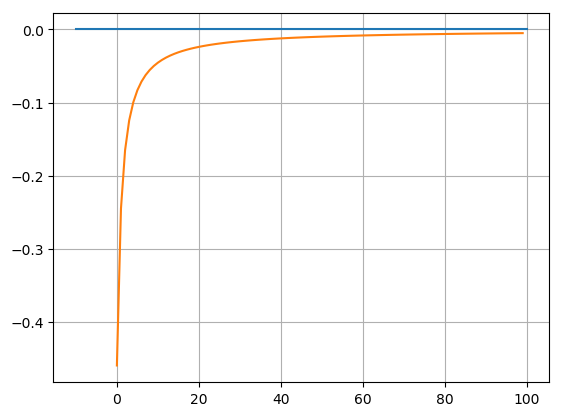

In [24]:
b=linspace(-10,100)
y=b*0
plot(b,y); #El valor de le derivada exacta
plot(real(a)); #Se grafica la derivada respecto al numero de la iteración n=1/h
grid("on");

### _Podemos notar que el valor de la aproximación efectivamente converge al valor de la derivada exacta_

# Ejercicio 3.
Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.
Tip: ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?


_Desarrollando las series de Taylor de $f(x+h)$ y de $f(x-h)$ tenemos que..._
$$f(x+h)=f(x)+hf'(x)+\dfrac{h^{2}}{2}f''(x)+\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$
$$f(x-h)=f(x)-hf'(x)+\dfrac{h^{2}}{2}f''(x)-\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$

Por otra parte, si restamos las dos expresiones anteriores tenemos que:
$$f(x+h)-f(x-h)=2hf'(x)+\dfrac{h^{3}}{3}f'''(x)+\mathcal{O}(h^{5})=
2hf'(x)+\mathcal{O}(h^{3})$$

Ahora dividiendo entre $2h$ y restamos $f'(x)$ tenemos que....
$$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^{2})$$
Despejando a $f'(x)$ y despreciando el error obtenemos...
$$f'(x)\approx \frac{f(x+h) -f(x-h)}{2h}$$

### Pregunta:¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

_La forma de hacer que la derivada sea más exacta es tomar un itervalo muy pequeño entre los puntos que tomamos de $$\frac{F(x+h)-F(x)}{h}$$
eso significa que $h$ tiene que ser muy pequeño, por lo tanto no hay manera de hacer la derivada exacta sin hacer $h$ pequeño._

# Ejercicio 4.
Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [25]:
function derivadasimetrica(f,x,h)   #definimos una función que recibe una función f, un punto donde se evalua la derivada,un h que es un cambio pequeño, que tiende a cero.
   return f2=(f(x+h)-f(x-h))/(2*h)  #pedimos que la función f1 sea el resultado de aplicar la función f a un (x+h)que es un cambio pequeño en el punto inicial X (tecnicamente aplicamos la definicion de derivad, sin hacer que h tienda a cero.)
end

derivadasimetrica (generic function with 1 method)

In [34]:
derivadasimetrica(x->cos(x),0,0.1) 

0.0

In [35]:
-sin(0)

-0.0

In [36]:
function derivadasimetrica2(f,x) #Realizamos lo mismo que en el ejercicio 2.
list=zeros(100)
n=1
           for i in 1:100
              df=(f(x+(1/n))-f(x-(1/n)))*n/2 
              list[i]=df; #Asignamos el valor de la derivada a un valor de la lista
              n+=1 #Se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list
end

derivadasimetrica2 (generic function with 1 method)

In [37]:
q=derivadasimetrica2(f,pi/4) #Evaluamos las dos funciones en el mismo punto (tomando el punro pi/4)

100-element Array{Float64,1}:
 -0.59501 
 -0.67801 
 -0.694085
 -0.699764
 -0.702402
 -0.703838
 -0.704704
 -0.705267
 -0.705653
 -0.705929
 -0.706133
 -0.706289
 -0.70641 
  ⋮       
 -0.707092
 -0.707092
 -0.707093
 -0.707093
 -0.707093
 -0.707093
 -0.707094
 -0.707094
 -0.707094
 -0.707095
 -0.707095
 -0.707095

In [40]:
w=derivada2(f,pi/4)


100-element Array{Float64,1}:
 -0.920065
 -0.851135
 -0.810849
 -0.787693
 -0.772877
 -0.762627
 -0.755126
 -0.749403
 -0.744896
 -0.741255
 -0.738252
 -0.735734
 -0.733593
  ⋮       
 -0.711064
 -0.711021
 -0.710978
 -0.710936
 -0.710895
 -0.710855
 -0.710815
 -0.710777
 -0.710739
 -0.710702
 -0.710666
 -0.710631

In [39]:
-sin(pi/4) #El valor exacto de la derivada


-0.7071067811865475

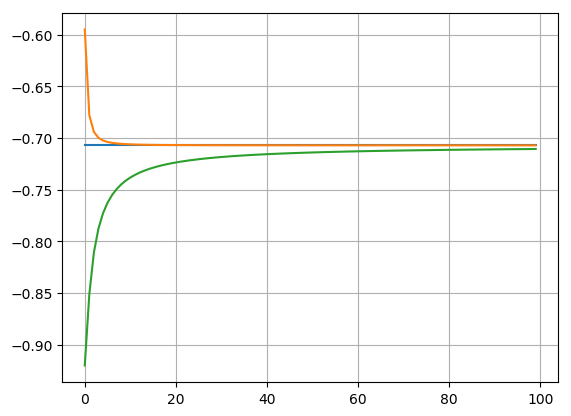

In [43]:
# damos el valor de la derivada exacta y graficamos hacia donde convergen las aproximaciones de nuestras funciones
z=zeros(100) 
for i in 1:100
    z[i]=-sin(pi/4)
end 
return z

plot(z);#Graficamos la soluciòn exacta de la derivada
plot(q); #Graficamos ambas funciones evaluadas en el mismo punto
plot(w);x=range(-10,100)
grid("on");

Podemos apreciar que la derivada simetrica (naranja) converge mucho más rápido que la derivada normal

# Ejercicio 5:
Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

_Para demostrar que $\Delta_h$ es una operador lineal debemos de ver que abra suma y saque escalares_

Probemos que abre sumas: $$\Delta_{h}( f +g) = \sum\nolimits_{n=1}^\infty \frac{h^n}{n!} \frac{d^n( f +g)}{dx^n}$$
Por las propiedades de la derivada y el resultado anterior hacemos... 
$$\Delta_{h}( f +g) = \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\left[ \frac{d^n f}{dx^n} +\frac{d^n g}{dx^n}\right]$$
y separamos de tal manera que:
$$= \sum\nolimits_{n = 1}^{\infty} \left[\frac{h^n}{n!}\frac{d^n f}{dx^n} + \frac{h^n}{n!} \frac{d^n g}{dx^n}\right]$$


$$ = \ \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^n} +\sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

usando la definición de $\Delta_{h}$
$$= \ \Delta_{h}(f) +\Delta_{h}(g)$$

Por lo tanto podemos decir que el operador abre sumas, ahora probemos que saca escalares, tomando una $a\epsilon R$ entonces...

$$\Delta_{h}(af)=\sum\nolimits_{n=1}^\infty \frac{h^n}{n!} \frac{d^n(af)}{dx^n}=a\sum\nolimits_{n=1}^\infty \frac{h^n}{n!} \frac{d^n(f)}{dx^n}= a\Delta_{h}(f)$$

todo lo anterior es posible ya que al $a$ ser una constante puede salir de la derivada y al no tener un subindice $n$ puede salir tambien de la suma.
Como cumple las condiciones de un operador lineal podemos decir que $\Delta_{h}$ es operador



# Ejercicio 6:
Para saber como se relaciona el operador derivada exacta con el operador diferencia finita hacia adelante es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma: $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$
Nota: En la clase se demostró que $\phi(x)=e^x-1$

Usando la serie de Taylor para la funcion exponencial
$$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$
Suponiendo ahora que $\Delta_{h}=\phi(x)$ y usandolo demostrado en clase de $ϕ(x)=ex−1$
$$\Delta_{h} = e^{h\frac{d}{dx}} -1$$
Ahora despejamos a $\frac{d}{dx}$ y queda como:
$$\frac{1}{h}ln(\Delta_{h} +1) = \frac{d}{dx}$$
y usando $$ln(1+x)= 0+\left. \frac{1}{1+x}\right|_{x=0}x-\frac{x^2}{2}$$
al final tenemos 
$$\frac{d}{dx} =\frac{1}{h}\left(\Delta_{h} -\frac{1}{2} \Delta_{h}^2+.....\right)$$